# Imports necessários

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from numpy import mean
from numpy import std
from matplotlib import pyplot
import seaborn as sns

# Import dos dados

## Receitas

In [2]:
dados_receitas = pd.read_csv('data/dados_receitas.csv', sep=';')
dados_receitas.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS
0,1722010101,2013-01-03,886cd0eabf5a18,185560.68,prefeitura municipal
1,1722010101,2013-01-04,886cd0eabf5a18,8081.80,prefeitura municipal
2,1722010101,2013-01-07,886cd0eabf5a18,4231.39,prefeitura municipal
3,1722010101,2013-01-08,886cd0eabf5a18,10536.53,prefeitura municipal
4,1722010101,2013-01-15,886cd0eabf5a18,103118.27,prefeitura municipal


# Feature Engineering

## Receitas

### Tratamento das colunas de tempo

In [3]:
# Converter a coluna 'DATA' para o tipo datetime
dados_receitas['DATA'] = pd.to_datetime(dados_receitas['DATA'])

# Extrair o ano e mês da coluna 'DATA' como novas features
dados_receitas['ANO_MES'] = dados_receitas['DATA'].dt.strftime('%Y-%m')

# Extrair o ano, mês e dia da coluna 'DATA' como novas features
dados_receitas['ANO'] = dados_receitas['DATA'].dt.year

In [4]:
df_organizado = dados_receitas.groupby(['ANO_MES', 'ANO'])['VALOR_ARRECADADO'].sum().reset_index()
df_organizado.head()

,ANO_MES,ANO,VALOR_ARRECADADO
0,2013-01,2013,5865563.10
1,2013-02,2013,6979863.94
2,2013-03,2013,6038308.84
3,2013-04,2013,6036720.77
4,2013-05,2013,6566028.25


In [5]:
df_organizado.shape

(120, 3)

### Sample dos dados

In [6]:
df_organizado['SMA(12)'] = df_organizado['VALOR_ARRECADADO'].rolling(window=12).mean()
df_organizado['SMA(6)'] = df_organizado['VALOR_ARRECADADO'].rolling(window=6).mean()
df_organizado['SMA(3)'] = df_organizado['VALOR_ARRECADADO'].rolling(window=3).mean()
df_organizado['SMA(2)'] = df_organizado['VALOR_ARRECADADO'].rolling(window=2).mean()
df_organizado.head()

,ANO_MES,ANO,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2)
0,2013-01,2013,5865563.10,NaN,NaN,NaN,NaN
1,2013-02,2013,6979863.94,NaN,NaN,NaN,6422713.520
2,2013-03,2013,6038308.84,NaN,NaN,6.294579e+06,6509086.390
3,2013-04,2013,6036720.77,NaN,NaN,6.351631e+06,6037514.805
4,2013-05,2013,6566028.25,NaN,NaN,6.213686e+06,6301374.510


In [7]:
df_organizado['lag(12)'] = df_organizado['VALOR_ARRECADADO'].shift(12)
df_organizado['lag(6)'] = df_organizado['VALOR_ARRECADADO'].shift(6)
df_organizado['lag(4)'] = df_organizado['VALOR_ARRECADADO'].shift(4)
df_organizado['lag(3)'] = df_organizado['VALOR_ARRECADADO'].shift(3)
df_organizado['lag(2)'] = df_organizado['VALOR_ARRECADADO'].shift(2)
df_organizado['lag(1)'] = df_organizado['VALOR_ARRECADADO'].shift(1)
df_organizado.head()

,ANO_MES,ANO,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
0,2013-01,2013,5865563.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-02,2013,6979863.94,NaN,NaN,NaN,6422713.520,NaN,NaN,NaN,NaN,NaN,5865563.10
2,2013-03,2013,6038308.84,NaN,NaN,6.294579e+06,6509086.390,NaN,NaN,NaN,NaN,5865563.10,6979863.94
3,2013-04,2013,6036720.77,NaN,NaN,6.351631e+06,6037514.805,NaN,NaN,NaN,5865563.10,6979863.94,6038308.84
4,2013-05,2013,6566028.25,NaN,NaN,6.213686e+06,6301374.510,NaN,NaN,5865563.1,6979863.94,6038308.84,6036720.77


In [8]:
df_organizado.dropna(inplace=True)
df_organizado.head()

,ANO_MES,ANO,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
12,2014-01,2014,7861439.06,7.285472e+06,7.973253e+06,8.161389e+06,8167542.965,5865563.10,6784352.82,7980163.57,7058840.99,8149080.25,8473646.87
13,2014-02,2014,8228264.74,7.389505e+06,7.958573e+06,8.187784e+06,8044851.900,6979863.94,8316345.74,7058840.99,8149080.25,8473646.87,7861439.06
14,2014-03,2014,6835740.62,7.455958e+06,7.767835e+06,7.641815e+06,7532002.680,6038308.84,7980163.57,8149080.25,8473646.87,7861439.06,8228264.74
15,2014-04,2014,8223473.05,7.638187e+06,7.961941e+06,7.762493e+06,7529606.835,6036720.77,7058840.99,8473646.87,7861439.06,8228264.74,6835740.62
16,2014-05,2014,8270822.01,7.780253e+06,7.982231e+06,7.776679e+06,8247147.530,6566028.25,8149080.25,7861439.06,8228264.74,6835740.62,8223473.05


In [9]:
df_organizado.drop(columns=['ANO'], inplace=True)

In [10]:
df_organizado['ANO_MES'] = pd.to_datetime(df_organizado['ANO_MES'])
df_organizado['ANO_MES'] = df_organizado['ANO_MES'].map(dt.datetime.toordinal)

### Implementação do modelo

In [173]:
train_size = int(len(df_organizado) * 0.75)
train_dataset, test_dataset = df_organizado.iloc[:train_size], df_organizado.iloc[train_size:]

In [174]:
train_dataset.head()

,ANO_MES,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
12,735234,7861439.06,7.285472e+06,7.973253e+06,8.161389e+06,8167542.965,5865563.10,6784352.82,7980163.57,7058840.99,8149080.25,8473646.87
13,735265,8228264.74,7.389505e+06,7.958573e+06,8.187784e+06,8044851.900,6979863.94,8316345.74,7058840.99,8149080.25,8473646.87,7861439.06
14,735293,6835740.62,7.455958e+06,7.767835e+06,7.641815e+06,7532002.680,6038308.84,7980163.57,8149080.25,8473646.87,7861439.06,8228264.74
15,735324,8223473.05,7.638187e+06,7.961941e+06,7.762493e+06,7529606.835,6036720.77,7058840.99,8473646.87,7861439.06,8228264.74,6835740.62
16,735354,8270822.01,7.780253e+06,7.982231e+06,7.776679e+06,8247147.530,6566028.25,8149080.25,7861439.06,8228264.74,6835740.62,8223473.05


Dimension of train data:  (81, 12)
Dimension of test data:  (27, 12)


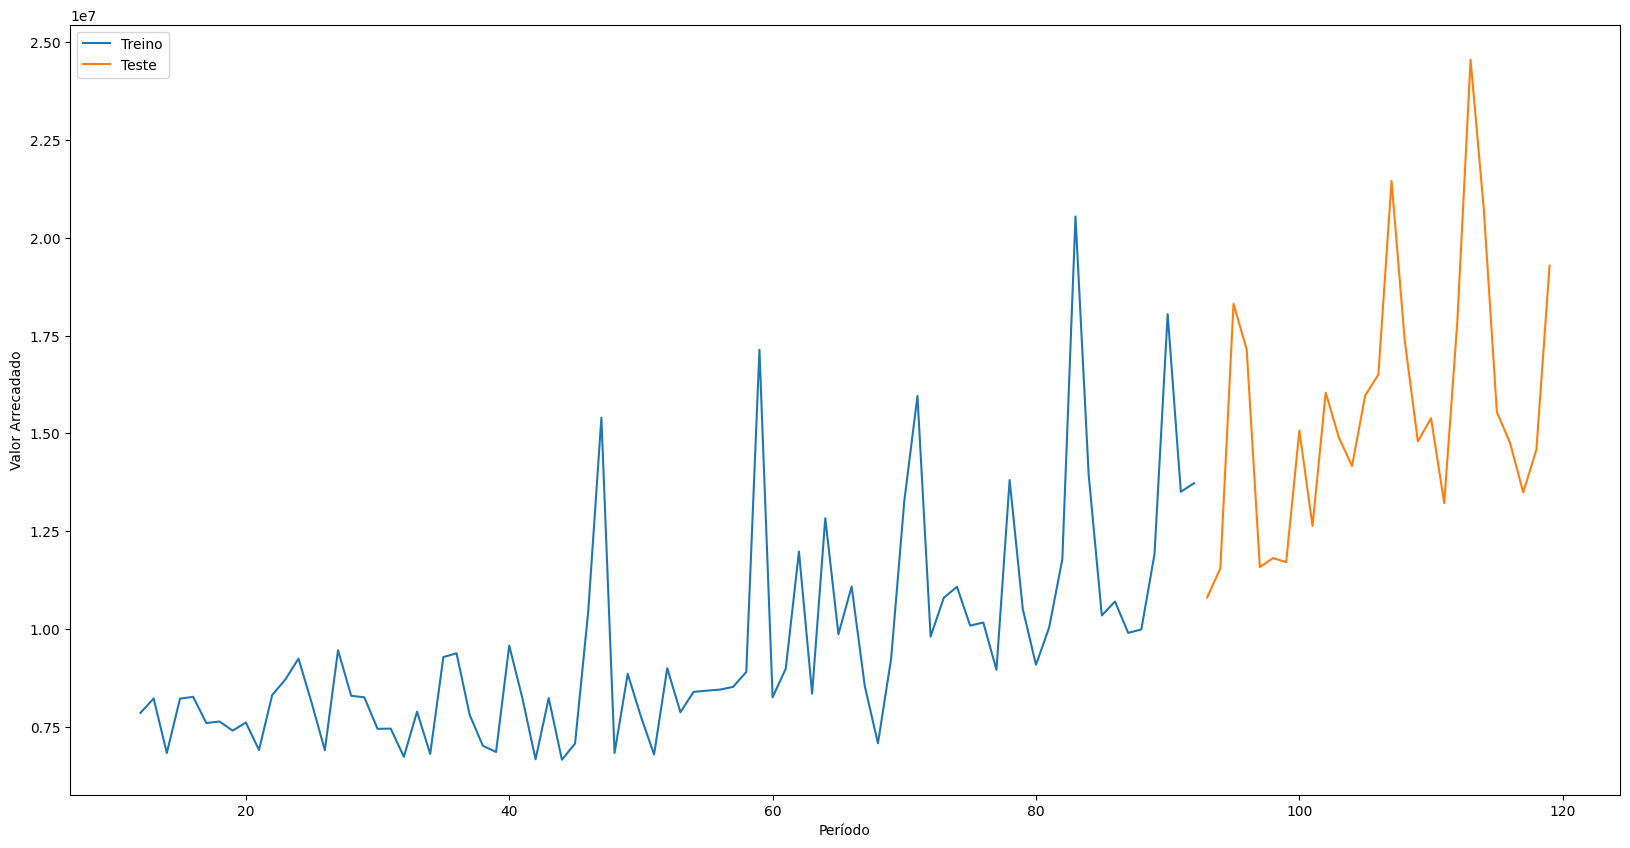

In [175]:
plt.figure(figsize=(20,10))
plt.plot(train_dataset['VALOR_ARRECADADO'])
plt.plot(test_dataset['VALOR_ARRECADADO'])
plt.xlabel('Período')
plt.ylabel('Valor Arrecadado')
plt.legend(['Treino', 'Teste'], loc='upper left')
print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [176]:
X_train = train_dataset.drop(['VALOR_ARRECADADO'], axis=1)
y_train = train_dataset.loc[:, ['VALOR_ARRECADADO']]

In [177]:
X_test = test_dataset.drop(['VALOR_ARRECADADO'], axis=1)
y_test = test_dataset.loc[:, ['VALOR_ARRECADADO']]

In [178]:
print('Dimension of X_train data: ', X_train.shape)
print('Dimension of y_train data: ', y_train.shape)
print('Dimension of X_test data: ', X_test.shape)
print('Dimension of y_test data: ', y_test.shape)

Dimension of X_train data:  (81, 11)
Dimension of y_train data:  (81, 1)
Dimension of X_test data:  (27, 11)
Dimension of y_test data:  (27, 1)


In [179]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

In [180]:
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

In [181]:
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

In [182]:
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [183]:
print('Dimension of train_y_norm data: ', train_x_norm.shape)
print('Dimension of train_x_norm data: ', train_y_norm.shape)
print('Dimension of test_y_norm data: ', test_x_norm.shape)
print('Dimension of test_x_norm data: ', test_y_norm.shape)

Dimension of train_y_norm data:  (81, 11)
Dimension of train_x_norm data:  (81, 1)
Dimension of test_y_norm data:  (27, 11)
Dimension of test_x_norm data:  (27, 1)


In [184]:
X_test = test_x_norm.reshape((test_x_norm.shape[0], 1, test_x_norm.shape[1]))
X_train = train_x_norm.reshape((train_x_norm.shape[0], 1, train_x_norm.shape[1]))
y_test = test_y_norm.reshape((test_y_norm.shape[0], 1))
y_train = train_y_norm.reshape((train_y_norm.shape[0], 1))

Ajuste no modelo com 32, 64 e 128 neurônios para verficação do mais adequado para a aplicação.

Epoch 1/100
16/16 [==============================] - 17s 264ms/step - loss: 0.0362 - val_loss: 0.1324
Epoch 2/100
16/16 [==============================] - 0s 20ms/step - loss: 0.0236 - val_loss: 0.0844
Epoch 3/100
16/16 [==============================] - 0s 17ms/step - loss: 0.0182 - val_loss: 0.0561
Epoch 4/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0183 - val_loss: 0.0478
Epoch 5/100
16/16 [==============================] - 0s 27ms/step - loss: 0.0180 - val_loss: 0.0459
Epoch 6/100
16/16 [==============================] - 0s 20ms/step - loss: 0.0160 - val_loss: 0.0430
Epoch 7/100
16/16 [==============================] - 0s 28ms/step - loss: 0.0153 - val_loss: 0.0391
Epoch 8/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0153 - val_loss: 0.0356
Epoch 9/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0158 - val_loss: 0.0325
Epoch 10/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0150 - val_loss: 0.02

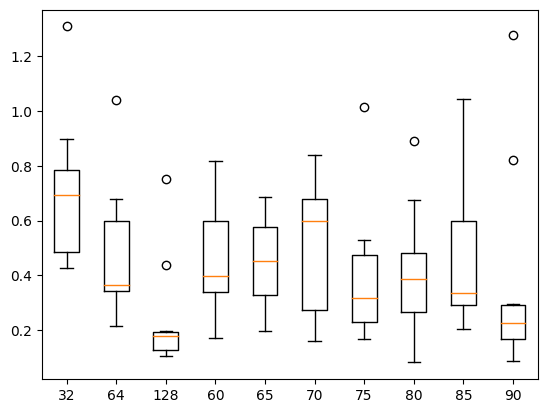

In [23]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = neurons))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=4)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('src/static/images/figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>Neurons={p}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [32, 64, 128, 60, 65, 70, 75, 80, 85, 90]
run_experiment(n_params)

Ajuste de modelo com tamanho do lote 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 e 12, para verificação do mais adequado para a aplicação.

Epoch 1/50
64/64 [==============================] - 7s 31ms/step - loss: 0.0166 - val_loss: 0.0345
Epoch 2/50
64/64 [==============================] - 0s 6ms/step - loss: 0.0134 - val_loss: 0.0259
Epoch 3/50
64/64 [==============================] - 0s 6ms/step - loss: 0.0115 - val_loss: 0.0171
Epoch 4/50
64/64 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0109
Epoch 5/50
64/64 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0079
Epoch 6/50
64/64 [==============================] - 0s 6ms/step - loss: 0.0067 - val_loss: 0.0091
Epoch 7/50
64/64 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 8/50
64/64 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0073
Epoch 9/50
64/64 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.0067
Epoch 10/50
64/64 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0083
Epoch 11/50
64/64 

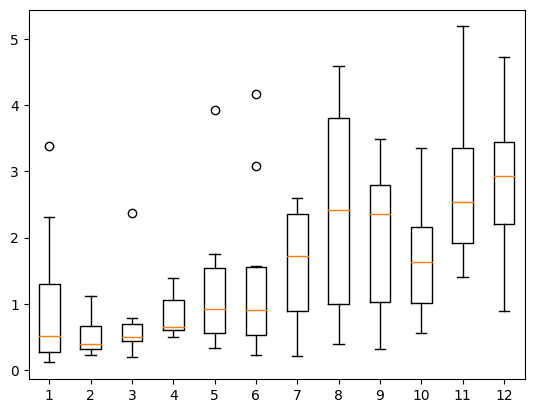

In [24]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=batch_size)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('src/static/images/figura[1].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = np.arange(1, 13)
run_experiment(n_params)

Ajuste no modelo com diluição - dropout - 0.05, 0.1, 0.2, 0.3, para verficação do mais adequado para a aplicação.

Epoch 1/50
13/13 [==============================] - 9s 142ms/step - loss: 0.0298 - val_loss: 0.0905
Epoch 2/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0158 - val_loss: 0.0427
Epoch 3/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0169 - val_loss: 0.0382
Epoch 4/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0147 - val_loss: 0.0369
Epoch 5/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0126 - val_loss: 0.0273
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0111 - val_loss: 0.0218
Epoch 7/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0089 - val_loss: 0.0170
Epoch 8/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0085 - val_loss: 0.0133
Epoch 9/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0070 - val_loss: 0.0096
Epoch 10/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 11/50
13/1

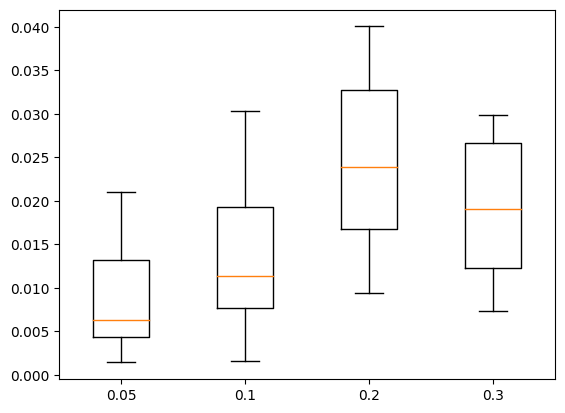

In [25]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=5)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('src/static/images/figura[2].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [0.05, 0.1, 0.2, 0.3]
run_experiment(n_params)

Ajustando o modelo com os padrões mais adequados visualizados nos testes anteriores.

<p>Neurônios = 65</p>
<p>Tamanho do lote/batch = 8</p>
<p>Dopout = 0.3</p>

In [185]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 65, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.LSTM(units = 65))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=150, batch_size=8, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=8)
    return loss

# Resumindo as pontuações
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print(f'Loss: Mean = {m:.3f}, Std = {s:.3f}')

# Rodando um experimento
def run_experiment(repeats = 10):
    # repetindo o experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score
        scores.append(score)
        print(f'>{r+1}: Score={score}')
    # resumindo os resultados
    summarize_results(scores)

# Rodando o experimento
run_experiment()

Epoch 1/150
8/8 [==============================] - 8s 243ms/step - loss: 0.0407 - val_loss: 0.1594
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.0299 - val_loss: 0.1152
Epoch 3/150
8/8 [==============================] - 0s 14ms/step - loss: 0.0230 - val_loss: 0.0788
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.0173 - val_loss: 0.0543
Epoch 5/150
8/8 [==============================] - 0s 14ms/step - loss: 0.0171 - val_loss: 0.0437
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 0.0176 - val_loss: 0.0408
Epoch 7/150
8/8 [==============================] - 0s 16ms/step - loss: 0.0162 - val_loss: 0.0398
Epoch 8/150
8/8 [==============================] - 0s 16ms/step - loss: 0.0167 - val_loss: 0.0388
Epoch 9/150
8/8 [==============================] - 0s 16ms/step - loss: 0.0156 - val_loss: 0.0364
Epoch 10/150
8/8 [==============================] - 0s 15ms/step - loss: 0.0168 - val_loss: 0.0340
Epoch 11/150
8/8 [

Criando modelo:

In [186]:
def create_model(units, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = units, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = units))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    return model

In [187]:
model_lstm = create_model(65, 0.3)

In [188]:
def fit_model(model):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=150, batch_size=8, validation_split = 0.2, shuffle=False, callbacks=[early_stop])
    return history

In [189]:
history_lstm = fit_model(model_lstm)

Epoch 1/150


8/8 [==============================] - 9s 250ms/step - loss: 0.0385 - val_loss: 0.1446
Epoch 2/150
8/8 [==============================] - 0s 13ms/step - loss: 0.0280 - val_loss: 0.1023
Epoch 3/150
8/8 [==============================] - 0s 15ms/step - loss: 0.0198 - val_loss: 0.0684
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.0184 - val_loss: 0.0494
Epoch 5/150
8/8 [==============================] - 0s 13ms/step - loss: 0.0195 - val_loss: 0.0444
Epoch 6/150
8/8 [==============================] - 0s 12ms/step - loss: 0.0189 - val_loss: 0.0444
Epoch 7/150
8/8 [==============================] - 0s 13ms/step - loss: 0.0166 - val_loss: 0.0438
Epoch 8/150
8/8 [==============================] - 0s 12ms/step - loss: 0.0152 - val_loss: 0.0410
Epoch 9/150
8/8 [==============================] - 0s 12ms/step - loss: 0.0145 - val_loss: 0.0383
Epoch 10/150
8/8 [==============================] - 0s 12ms/step - loss: 0.0147 - val_loss: 0.0348
Epoch 11/150
8/8 [============

Salvando modelo:

In [190]:
model_lstm.save('receitas_2013_2022')

INFO:tensorflow:Assets written to: receitas_2013_2022\assets


INFO:tensorflow:Assets written to: receitas_2013_2022\assets


Carga do modelo salvo:

In [191]:
model_lstm = tf.keras.models.load_model('receitas_2013_2022')

Pré-processamento e predição da base de testes com a utilização do modelo carregado:

In [192]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [193]:
def prediction(model):
    y_pred = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred)
    return y_pred

In [194]:
prediction_lstm = prediction(model_lstm)

1/1 [==============================] - 2s 2s/step


In [195]:
def plot_future(prediction, y_test):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='Dados reais')
    plt.plot(np.arange(range_future), np.array(prediction),label='Predição')
    plt.legend(loc='upper left')
    plt.xlabel('Período')
    plt.ylabel('Valor Arrecadado')
    plt.title('Predição de Receitas - LSTM')
    plt.savefig('src/static/images/figura[3].png')
    plt.show()

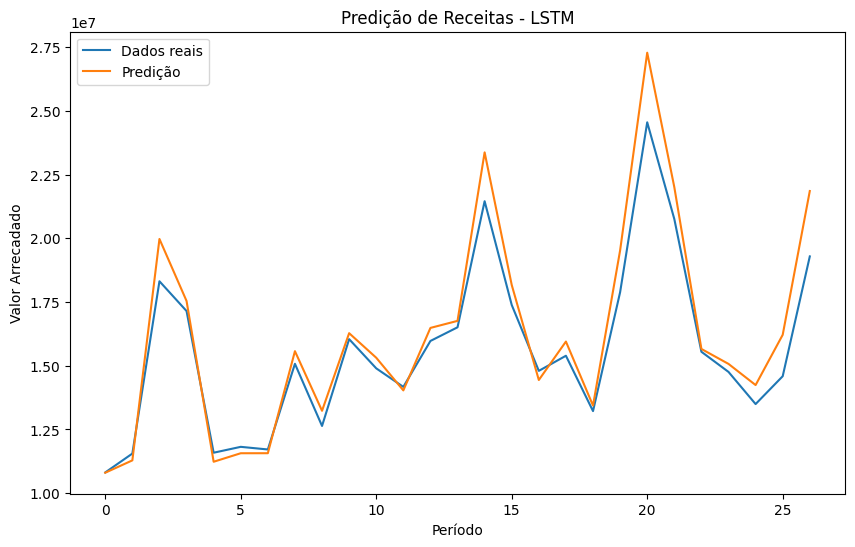

In [196]:
plot_future(prediction_lstm, y_test)

Cálculo do erro médio absoluto e raiz quadrática média:

In [199]:
def evaluate_prediction(prediction_lstm, actual, model_name):
    errors = prediction_lstm - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(f'{model_name}:')
    print(f'MSE = {mse:.2f}; RMSE = {rmse:.2f}; MAE = {mae:.2f}')

In [200]:
evaluate_prediction(prediction_lstm, y_test, 'LSTM')

LSTM:
MSE = 1138170964222.40; RMSE = 1066850.96; MAE = 760776.39


Pré-processamento dos dados e aplicação do modelo em toda a base de dados (treino + teste):

In [201]:
X = df_organizado.drop(['VALOR_ARRECADADO'], axis=1)
y = df_organizado.loc[:, ['VALOR_ARRECADADO']]

In [202]:
y_norm = output_scaler.transform(y)
X_norm = input_scaler.transform(X)

In [203]:
X = X_norm.reshape((X_norm.shape[0], 1, X_norm.shape[1]))
y = y_norm.reshape((y_norm.shape[0], 1))

In [204]:
y = scaler_y.inverse_transform(y)

In [205]:
def prediction(model):
    y_pred = model.predict(X)
    y_pred = scaler_y.inverse_transform(y_pred)
    return y_pred

In [206]:
prediction_lstm = prediction(model_lstm)

4/4 [==============================] - 0s 4ms/step


In [207]:
def plot_future(prediction, y):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y), label='Dados reais')
    plt.plot(np.arange(range_future), np.array(prediction),label='Predição')
    plt.legend(loc='upper left')
    plt.xlabel('Período')
    plt.ylabel('Valor Arrecadado')
    plt.title('Predição de Receitas - LSTM')
    plt.savefig('src/static/images/figura[4].png')
    plt.show()

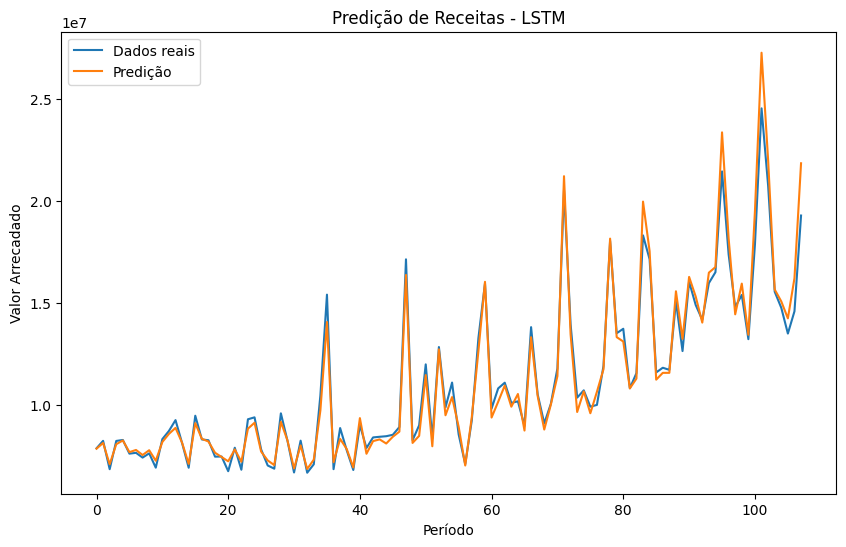

In [208]:
plot_future(prediction_lstm, y)

Cálculo do erro médio percentual:

In [209]:
real = y.flatten()
previsto = prediction_lstm.flatten()

In [210]:
tabela = pd.DataFrame([real, previsto]).T
tabela = tabela.rename(columns={0: 'Real', 1: 'Previsto'})
tabela['Diferenca'] = 1 - (tabela['Real'] / tabela['Previsto'])
media_tabela = tabela['Diferenca'].mean() * 100
print(f'Erro médio percentual: {media_tabela:.2f}%')

Erro médio percentual: -0.01%


Distribuição de erros:

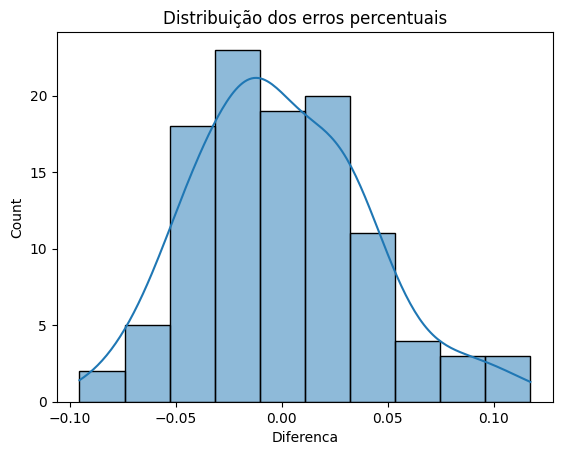

In [211]:
sns.histplot(data=tabela, x='Diferenca', kde=True).set_title('Distribuição dos erros percentuais').get_figure().savefig('src/static/images/figura[5].png')

In [212]:
previsao = df_organizado

In [213]:
previsao

,ANO_MES,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
12,735234,7861439.06,7.285472e+06,7.973253e+06,8.161389e+06,8.167543e+06,5865563.10,6784352.82,7980163.57,7058840.99,8149080.25,8473646.87
13,735265,8228264.74,7.389505e+06,7.958573e+06,8.187784e+06,8.044852e+06,6979863.94,8316345.74,7058840.99,8149080.25,8473646.87,7861439.06
14,735293,6835740.62,7.455958e+06,7.767835e+06,7.641815e+06,7.532003e+06,6038308.84,7980163.57,8149080.25,8473646.87,7861439.06,8228264.74
15,735324,8223473.05,7.638187e+06,7.961941e+06,7.762493e+06,7.529607e+06,6036720.77,7058840.99,8473646.87,7861439.06,8228264.74,6835740.62
16,735354,8270822.01,7.780253e+06,7.982231e+06,7.776679e+06,8.247148e+06,6566028.25,8149080.25,7861439.06,8228264.74,6835740.62,8223473.05
...,...,...,...,...,...,...,...,...,...,...,...,...
115,738368,15546474.80,1.730145e+07,1.789007e+07,2.028313e+07,1.815041e+07,14895904.74,14796988.62,13218515.53,17882570.38,24548567.19,20754348.32
116,738399,14755666.11,1.735041e+07,1.778436e+07,1.701883e+07,1.515107e+07,14168150.37,15389970.91,17882570.38,24548567.19,20754348.32,15546474.80
117,738429,13494171.35,1.714406e+07,1.783030e+07,1.459877e+07,1.412492e+07,15970308.83,13218515.53,24548567.19,20754348.32,15546474.80,14755666.11
118,738460,14586556.77,1.698410e+07,1.728096e+07,1.427880e+07,1.404036e+07,16506070.90,17882570.38,20754348.32,15546474.80,14755666.11,13494171.35


In [214]:
periodo = 10  # escolha o período de previsão à frente será executado

for i in range(periodo):
    # Crie uma nova linha de dados vazia
    row = pd.DataFrame(columns=previsao.columns)

    # Calcule as médias e valores de atraso
    row.loc[0, 'SMA(12)'] = previsao['VALOR_ARRECADADO'].iloc[-12:].mean()
    row.loc[0, 'SMA(6)'] = previsao['VALOR_ARRECADADO'].iloc[-6:].mean()
    row.loc[0, 'SMA(3)'] = previsao['VALOR_ARRECADADO'].iloc[-3:].mean()
    row.loc[0, 'SMA(2)'] = previsao['VALOR_ARRECADADO'].iloc[-2:].mean()
    row.loc[0, 'lag(12)'] = previsao['VALOR_ARRECADADO'].iloc[-12]
    row.loc[0, 'lag(6)'] = previsao['VALOR_ARRECADADO'].iloc[-6]
    row.loc[0, 'lag(4)'] = previsao['VALOR_ARRECADADO'].iloc[-4]
    row.loc[0, 'lag(3)'] = previsao['VALOR_ARRECADADO'].iloc[-3]
    row.loc[0, 'lag(2)'] = previsao['VALOR_ARRECADADO'].iloc[-2]
    row.loc[0, 'lag(1)'] = previsao['VALOR_ARRECADADO'].iloc[-1]

    # Incremente a data
    row.loc[0, 'ANO_MES'] = previsao['ANO_MES'].iloc[-1]+1
    
    # Excluindo a coluna de valor arrecadado
    row = row.drop(['VALOR_ARRECADADO'], axis=1)
    
    # Transforme a linha em um array e normalize
    row = np.array(row.iloc[-1]).reshape(1, -1)
    row_norm = input_scaler.transform(row)

    # Preveja usando o modelo LSTM
    to_prev = row_norm.reshape((row_norm.shape[0], 1, row_norm.shape[1]))
    prev = model_lstm.predict(to_prev)
    prev = scaler_y.inverse_transform(prev)

    # Crie um DataFrame com a previsão e adicione ao DataFrame principal
    row_ = pd.DataFrame(row, columns = ['ANO_MES', 'SMA(12)', 'SMA(6)', 'SMA(3)', 'SMA(2)', 'lag(12)', 'lag(6)', 'lag(4)', 'lag(3)', 'lag(2)', 'lag(1)'])
    row_.loc[0, 'VALOR_ARRECADADO'] = prev[0]
    previsao = pd.concat([previsao, row_], ignore_index=True)

1/1 [==============================] - 0s 52ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step


In [215]:
previsao

,ANO_MES,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
0,735234,7861439.06,7285471.934167,7973252.746667,8161388.726667,8167542.965,5865563.1,6784352.82,7980163.57,7058840.99,8149080.25,8473646.87
1,735265,8228264.74,7389505.334167,7958572.58,8187783.556667,8044851.9,6979863.94,8316345.74,7058840.99,8149080.25,8473646.87,7861439.06
2,735293,6835740.62,7455957.9825,7767835.421667,7641814.806667,7532002.68,6038308.84,7980163.57,8149080.25,8473646.87,7861439.06,8228264.74
3,735324,8223473.05,7638187.339167,7961940.765,7762492.803333,7529606.835,6036720.77,7058840.99,8473646.87,7861439.06,8228264.74,6835740.62
4,735354,8270822.01,7780253.485833,7982231.058333,7776678.56,8247147.53,6566028.25,8149080.25,7861439.06,8228264.74,6835740.62,8223473.05
...,...,...,...,...,...,...,...,...,...,...,...,...
113,738496,19522492.00,17660723.288333,18040482.486667,18379688.0,18557335.0,24548567.19,19287535.92,18140532.0,18024394.0,17435576.0,19679094.0
114,738497,20201186.00,17241883.689167,18079641.833333,18879054.0,19600793.0,20754348.32,15675763.0,18024394.0,17435576.0,19679094.0,19522492.0
115,738498,20849280.00,17195786.829167,18833879.0,19800924.0,19861839.0,15546474.8,18140532.0,17435576.0,19679094.0,19522492.0,20201186.0
116,738499,20927270.00,17637687.2625,19285337.0,20190986.0,20525233.0,14755666.11,18024394.0,19679094.0,19522492.0,20201186.0,20849280.0
